# 🛒 Modelo predictivo para determinar el nivel de venta en transacciones E-commerce 

Construir un modelo que permita predecir si una transacción de un cliente corresponde a una venta de monto alto (`ventas = 1`) o o venta de monto bajo (`ventas = 0`) en un entorno de comercio electrónico.

## 📌Componentes del trabajo 
El E-commerce o comercio electrónico a presentado un crecimiento continuo en la economía, teniendo como hito importante la llegada de la pandemia o COVID 19 en el año 2020, a partir del confinamiento obligatorio los consumidores tuvieron la necesidad de probar nuevos canales comerciales, el comercio electrónico permitió al consumidor comprar bienes y servicios a través de medios electrónicos, páginas web online o por medio de plataformas como redes sociales. A partir de allí los hábitos de compra, consumo y venta se transformaron radicalmente obligando a las empresas a adaptarse para seguir siendo competitivas en el mercado. 

El E-commerce se convirtió en una estrategia clave para las empresas y consumidores debido a que ofrece ventajas como procesos de compra agiles, múltiples modelos de negocio, reducción de costos en las operaciones, variedad de herramientas de publicidad y marketing, flexibilidad en la prestación del servicio, comparación de precios, ofrece diversas de formas de pago y se adapta a las necesidades del cliente. El comercio electrónico no es solo un catálogo sino un servicio completo en el cual se ofrece una experiencia digital en donde se encuentra una plataforma de venta, una pasarela de pagos, un sistema de gestión de inventarios y un servicio de logística y envíos.  

Sin embargo, este es un modelo de negocio muy competitivo que requiere elementos diferenciadores que permitan captar la atención del cliente y que logren moldearse a sus necesidades. Mejorar la experiencia digital del usuario o cliente requiere potenciar aspectos como el marketing digital como factor clave, la publicidad en línea y las estrategias de captación son esenciales para el crecimiento del mercado e-commerce. 

Para la sostenibilidad el mercado E-commerce es necesario conocer las tendencias o patrones de comportamiento de distintos elementos que podrían afectar la dirección de este mercado, factores como comportamiento de navegación del cliente, el análisis de consumo, la cultura, los avances tecnológicos entre otros, serán herramientas fundamentales para predecir y establecer estrategias dirigidas hacia el comportamiento futuro del mercado.  

El uso de modelos predictivos ofrece beneficios que pueden optimizar la gestión, planificación y optimización de inventarios, ayuda a identificar cambios en la demanda, permite identificar tendencias de productos a largo plazo, permite conocer el comportamiento a futuro de los clientes ayudan a anticiparse y generar estrategias planificadas que permitan tomar decisiones acertadas y eficaces que generen fidelización en el cliente; Conocer los montos de transacción de las ventas E-commerce permite prever cambios que lleven a anticiparse y generar campañas publicitarias y de marketing direccionadas a las necesidades específicas de los clientes y usar esto como ventaja competitiva ante un mercado cambiante. 

Para el modelo predictivo se tomó una base de datos mediante “Kaggle” la cual contiene información del comportamiento de los consumidore de comercio electrónico, esta incluye información sobre patrones de compra, datos demográficos, precios de compra, entre otros, la base de datos es publica y contiene 5000 datos con 9 variables. A continuación, se observa el listado de variables de la base de datos: 


## 🎯 Variable Objetivo: `ventas`

La variable `ventas` es binaria y representa si una compra fue significativamente alta en valor, basada en un `score` calculado como:

- **unit_price**: Precio
- **quantity**: Monto estimado de la compra
- **website_visits**: Nivel de interés del cliente
- **app_usage_score**: Compromiso digital (0=Low, 1=Medium, 2=High)
- **loyalty_program**: Bonificación de 50 puntos si el cliente es leal
- **discount_applied**: Bonificación de 30 puntos si se usó un descuento

Se asigna `ventas = 1` si el `score` está por encima del percentil 75 del total.

## 🔍 Descripción de variables de la base
- **unit_price**: Precio
- **quantity**: Monto estimado de la compra
- **website_visits**: Nivel de interés del cliente
- **membership_years**: Años que el cliente forma parte de un programa de fidelización
- **age**: Edad del cliente (entero)
- **gender**:Género del cliente (categórico: Hombre, Mujer)
- **app_usage_score**: Compromiso digital (0=Low, 1=Medium, 2=High)
- **loyalty_program**: Bonificación de 50 puntos si el cliente es leal
- **discount_applied**: Bonificación de 30 puntos si se usó un descuento

---

Utilizaremos los siguientes modelos para predecir esta variable:
- Regresión logística
- KNN
- Árbol de decisión

Evaluaremos el desempeño de cada modelo usando:
- Precisión y recall
- Matriz de confusión
- Curva ROC y AUC

# PASO 1: Instalar librerías

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## PASO 1.1: Importar herramientas de modelado y evaluación

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

# PASO 2: Cargar dataset  y crear variable objetivo

In [61]:
df = pd.read_csv("ecommerce_roc_moderado.csv")
df['loyalty_program'] = df['loyalty_program'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

score_temp = (
    df["unit_price"] * df["quantity"] +
    df["website_visits"] +
    df["app_usage_score"] +
    50 * df["loyalty_program"] +
    30 * df["discount_applied"]
)

# Calcular el percentil 75 como umbral
threshold = np.percentile(score_temp, 75)

# Crear la variable binaria 'ventas' (objetivo)
df["ventas"] = (score_temp > threshold).astype(int)

# Eliminar el score para evitar fuga de datos
del score_temp

* (df["score"] > threshold) : Compara cada de la columna score con el valor de corte (threshold), que suele ser el percentil 75.

Esto devuelve una serie de valores True o False
* .astype(int)
Convierte los True en 1 y los False en 0, Se convierte el resultado booleano
* df["ventas"] = Asigna ese resultado a una nueva columna en el DataFrame, llamada ventas.

# Paso 3: Revisar estructura del dataset

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unit_price        5000 non-null   float64
 1   quantity          5000 non-null   int64  
 2   website_visits    5000 non-null   int64  
 3   membership_years  5000 non-null   int64  
 4   app_usage_score   5000 non-null   int64  
 5   discount_applied  5000 non-null   int64  
 6   age               5000 non-null   int64  
 7   loyalty_program   5000 non-null   int64  
 8   gender            5000 non-null   int64  
 9   ventas            5000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 390.8 KB


* Tenemos 10 variables donde Ventas es una dataframe e igual score. 
* Donde dos variables son float64 (Número decimal) y 9 son int64 (Número entero)

# Paso 4: Descripción estadística general


In [63]:
df.describe(include='all')

,unit_price,quantity,website_visits,membership_years,app_usage_score,discount_applied,age,loyalty_program,gender,ventas
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,50.084029,5.035000,54.086400,4.485800,1.003000,0.402600,40.806200,0.596400,0.503800,0.250000
std,14.947197,2.595057,26.056322,2.878377,0.821904,0.490471,13.558518,0.490668,0.500036,0.433056
min,1.380990,1.000000,10.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,40.131424,3.000000,31.000000,2.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000
50%,50.201984,5.000000,54.000000,5.000000,1.000000,0.000000,41.000000,1.000000,1.000000,0.000000
75%,59.990159,7.000000,76.000000,7.000000,2.000000,1.000000,52.000000,1.000000,1.000000,0.250000
max,108.893566,9.000000,99.000000,9.000000,2.000000,1.000000,64.000000,1.000000,1.000000,1.000000


# Visualización exploratoria

## Gráfico 1: Histograma de distribución de edad

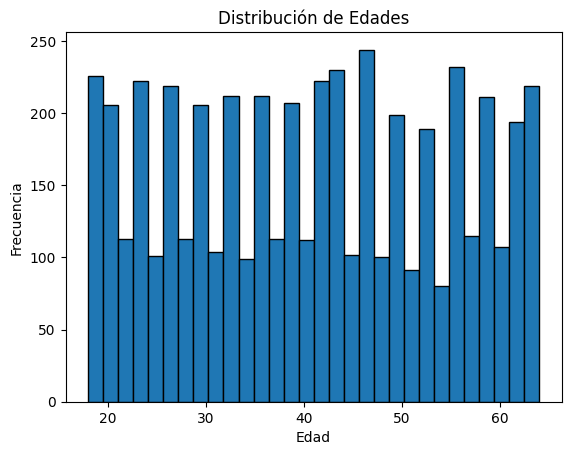

In [64]:

df['age'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Esta histograma de edades nos muestra que los datos no se distribuyen normalmente y la edad mínima es 18 años y la máxima es 64 años.

## Gráfico 2: Distribución de Website Visits según Tipo de Venta

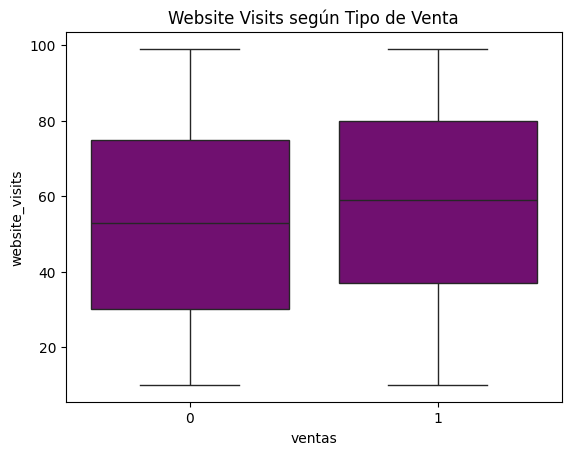

In [65]:
# Visitas al sitio
sns.boxplot(x='ventas', y='website_visits', data=df, color='purple')
plt.title("Website Visits según Tipo de Venta")
plt.show()

En promedio los clientes que generan ventas altas (1) hacen más visitas al sitio Web.

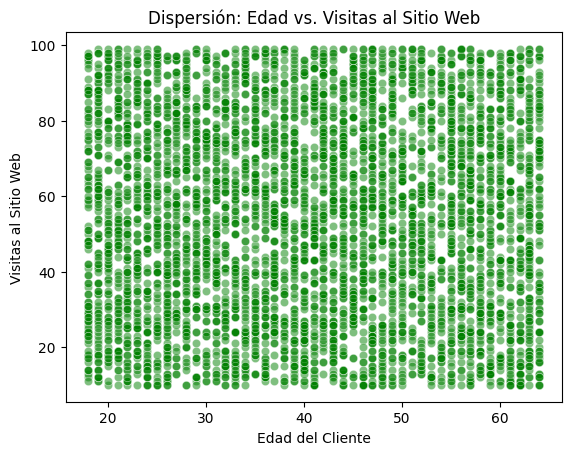

In [66]:
# Dispersión entre Edad e Ingreso
sns.scatterplot(x='age', y='website_visits', alpha=0.5, data=df, color='green')
plt.title('Dispersión: Edad vs. Visitas al Sitio Web')
plt.xlabel('Edad del Cliente')
plt.ylabel('Visitas al Sitio Web')
plt.show()

La edad del cliente no parece influir significativamente en la cantidad de visitas al sitio web. Esta relación parece débil o nula, lo cual implica que age y website_visits probablemente no estén correlacionadas.

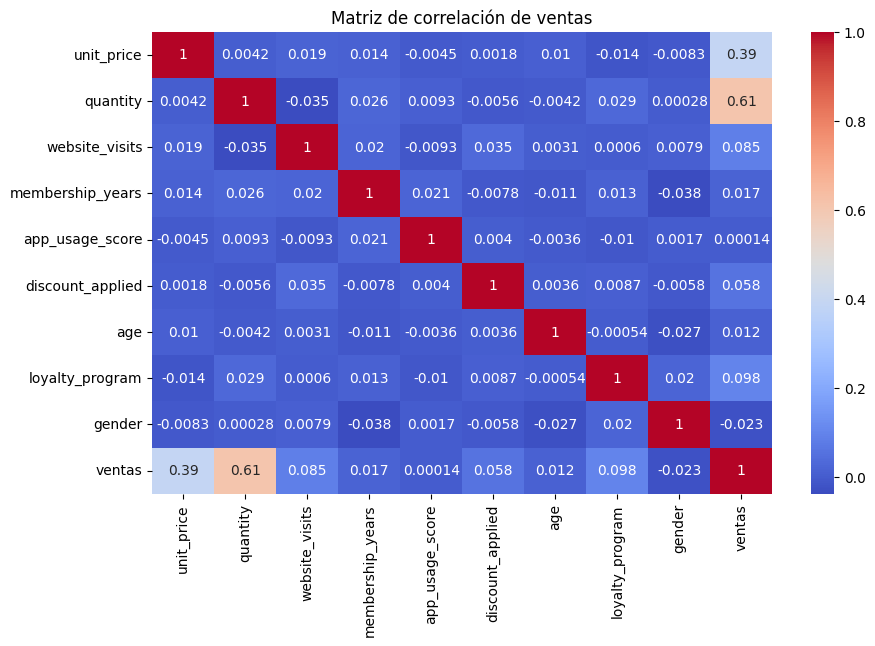

In [67]:
# Mapa de calor de correlaciones numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df[["unit_price", "quantity", "website_visits", "membership_years", "app_usage_score", "discount_applied", "age", "loyalty_program", "gender", "ventas"]].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de ventas')
plt.show()

En la correlación evidenciamos que quantity tiene una alta correlacción que puede traer mayor probabilidad de ventas altas, al igual que unit_price. Mientras que app_usage_score no influye directamente.

 # Paso 5: Evaluación del modelo antes de limpiar los datos

In [68]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Seleccionar variables simples antes de limpieza
df_before = df[[
    "unit_price", "quantity", "website_visits", "app_usage_score", "loyalty_program"
]].dropna()

Xb = df_before.copy()
yb = df.loc[df_before.index, "ventas"]

# División
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

# Modelo base
model_before = LogisticRegression(max_iter=300)
model_before.fit(Xb_train, yb_train)

# Evaluación
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)
print("✅ Exactitud antes de limpieza:", round(acc_before, 4))

✅ Exactitud antes de limpieza: 0.9667


Este valor indica que el modelo de regresión logística logró una exactitud del 96.67% al predecir si una transacción corresponde a una venta alta (ventas = 1) o baja (ventas = 0), utilizando únicamente las variables Precio unitario (unit_price), Cantidad (quantity), Visitas al sitio web (website_visits), Uso de la app (app_usage_score) y Pertenencia al programa de lealtad (loyalty_program), sin aplicar limpieza ni transformación previa sobre los datos.

# Paso 6: Preparación del dataset: limpieza, imputación y codificación

In [69]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Copia del dataset original
df_clean = df.copy()

# Codificación one-hot si no se hizo antes (aquí ya está en 0/1)
# df_clean = pd.get_dummies(df_clean, columns=['gender'], drop_first=True)

# Imputación específica
df_clean = df_clean.dropna(axis=1, how='all')  # elimina columnas totalmente vacías

num_cols = ['age', 'website_visits', 'membership_years', 
            'discount_applied', 'unit_price', 'quantity']

imputer = SimpleImputer(strategy='median')
df_clean[num_cols] = imputer.fit_transform(df_clean[num_cols])

# Escalado
scaler = MinMaxScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

# Paso 7: Evaluación del modelo después de la limpieza

In [70]:
# Selección de X e y
Xc = df_clean.drop(columns=['ventas'])
yc = df_clean['ventas']

# División
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

# Modelo limpio
model_after = LogisticRegression(max_iter=200)
model_after.fit(Xc_train, yc_train)

# Evaluación
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)
print("✅ Exactitud después de la limpieza:", round(acc_after, 4))

✅ Exactitud después de la limpieza: 0.962


Despues de la limpieza de datos, nos baja de 96.67% a 96.2% al predecir si una transacción corresponde a una venta alta (ventas = 1) o baja (ventas = 0).


### 🤖Regresión logística

In [71]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(Xc_train, yc_train)
log_model.fit(Xc_train, yc_train)
log_pred = log_model.predict(Xc_test)
log_prob = log_model.predict_proba(Xc_test)[:, 1]

print("📊 Logistic Regression Accuracy:", round(accuracy_score(yc_test, log_pred), 6))
print(classification_report(yc_test, log_pred))

📊 Logistic Regression Accuracy: 0.962
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1119
           1       0.94      0.91      0.92       381

    accuracy                           0.96      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.96      0.96      0.96      1500



* Recall: De todas las ventas realmente bajas, el 98% fueron detectadas correctamente y para las ventas altas fue de 91%.
* Precision: De todas las veces que el modelo predijo "venta baja", el 97% eran realmente bajas, y las veces que predijo "venta alta" acertando el 94%. 

##### 🧠Curva ROC  y Matriz de Confusión

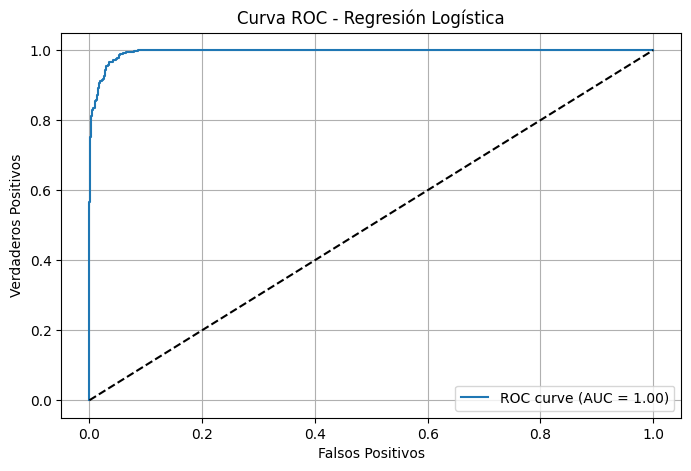

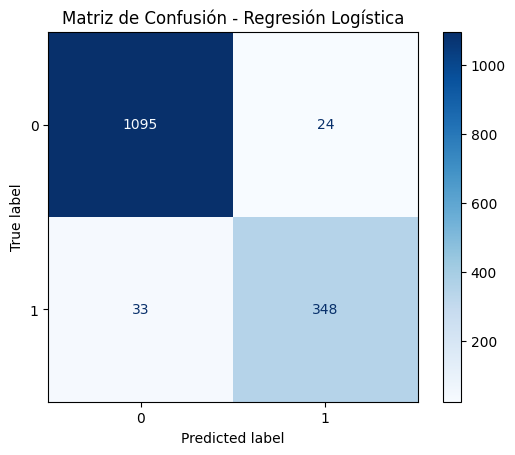

In [74]:
fpr, tpr, _ = roc_curve(yc_test, log_prob)
roc_auc = roc_auc_score(yc_test, log_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.grid(True)
plt.show()

ConfusionMatrixDisplay.from_estimator(log_model, Xc_test, yc_test, cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

* La curva ROC y la AUC nos muestra que el modelo distingue perfectamente entre ventas altas (1) y ventas bajas (0), teniendo que ningun punto se confunde entre clases, con el área debajo de la curva es de 1 que indica un rendimiento excelente.
* La matriz de confusión: 1095 transacciones fueron correctamente clasificadas a venta baja, mientras que 348 transacciones fueron clasificadas como venta alta. Esto nos esta diciendo que el modelo clasifica mejor las ventas bajas que las ventas altas.

### 🤖 KNN

In [75]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(Xc_train, yc_train)
knn_pred = knn_model.predict(Xc_test)

print("🔎 KNN Accuracy:", round(accuracy_score(yc_test, knn_pred), 4))
print(classification_report(yc_test, knn_pred))

🔎 KNN Accuracy: 0.856
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1119
           1       0.73      0.68      0.71       381

    accuracy                           0.86      1500
   macro avg       0.81      0.80      0.81      1500
weighted avg       0.85      0.86      0.85      1500



**Clase 0- Venta baja**:
* La precisión: cuando el modelo dice que es una venta baja el modelo acierta 89% de las veces.
* Recall: De todas las ventas bajas reales el 92% de las ventas fueron correctamente identificadas.
  
**Clase 1-Venta alta**:
* Precision: El modelo cuando predice una venta alta acierta el 73%.
* Recall: Solo se logra identificar el 68% de las ventas altas.

### 🤖Árbol de decisión

🌳 Árbol de Decisión Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1119
           1       0.89      0.91      0.90       381

    accuracy                           0.95      1500
   macro avg       0.93      0.94      0.93      1500
weighted avg       0.95      0.95      0.95      1500



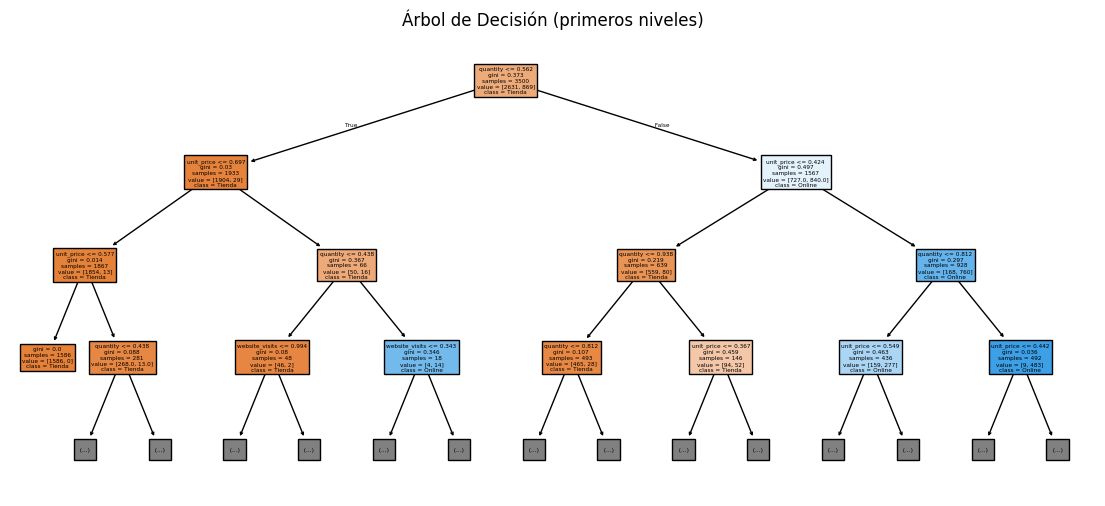

In [76]:
tree_model = DecisionTreeClassifier( random_state=42)
tree_model.fit(Xc_train, yc_train)
tree_pred = tree_model.predict(Xc_test)

print("🌳 Árbol de Decisión Accuracy:", round(accuracy_score(yc_test, tree_pred), 4))
print(classification_report(yc_test, tree_pred))

plt.figure(figsize=(14, 6))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=Xc.columns, class_names=["Tienda", "Online"])
plt.title("Árbol de Decisión (primeros niveles)")
plt.show()

El modelo clasifica correctamente el 95% de las transacciones, tiene un buen equilibrio de acuerdo con F1-score.
Además se visualiza que las variables claves son unit_price (raíz del árbol), quantity (ramas en el primer nivel) este es altamente predictivo y finalmente tenemos website_visits (niveles más profundos del árbol) lo que equivale a la refinación de la predicción.

## Comparación modelos

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

models = {
    'KNN': KNeighborsClassifier(),
    'Regresión Logística': LogisticRegression(max_iter=300),
    'Árbol de Decisión': DecisionTreeClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, Xc_train, yc_train, cv=5, scoring='accuracy')
    print(f"{name}: Exactitud promedio (cross-val): {scores.mean():.3f} ± {scores.std():.3f}")


KNN: Exactitud promedio (cross-val): 0.860 ± 0.009
Regresión Logística: Exactitud promedio (cross-val): 0.959 ± 0.004
Árbol de Decisión: Exactitud promedio (cross-val): 0.957 ± 0.006


Podemos interpretar que la Regresión Logística tiene mejor exactitud y también menor variabilidad, demostrandonos estabilidad en su rendimiento. Sin embargo, el Árbol de Decisión no está abajo de la Regresión Logística, solo que presenta más variaciones. Mientras que el KNN ndica que su desempeño es menos consistente dependiendo del conjunto de entrenamiento.  

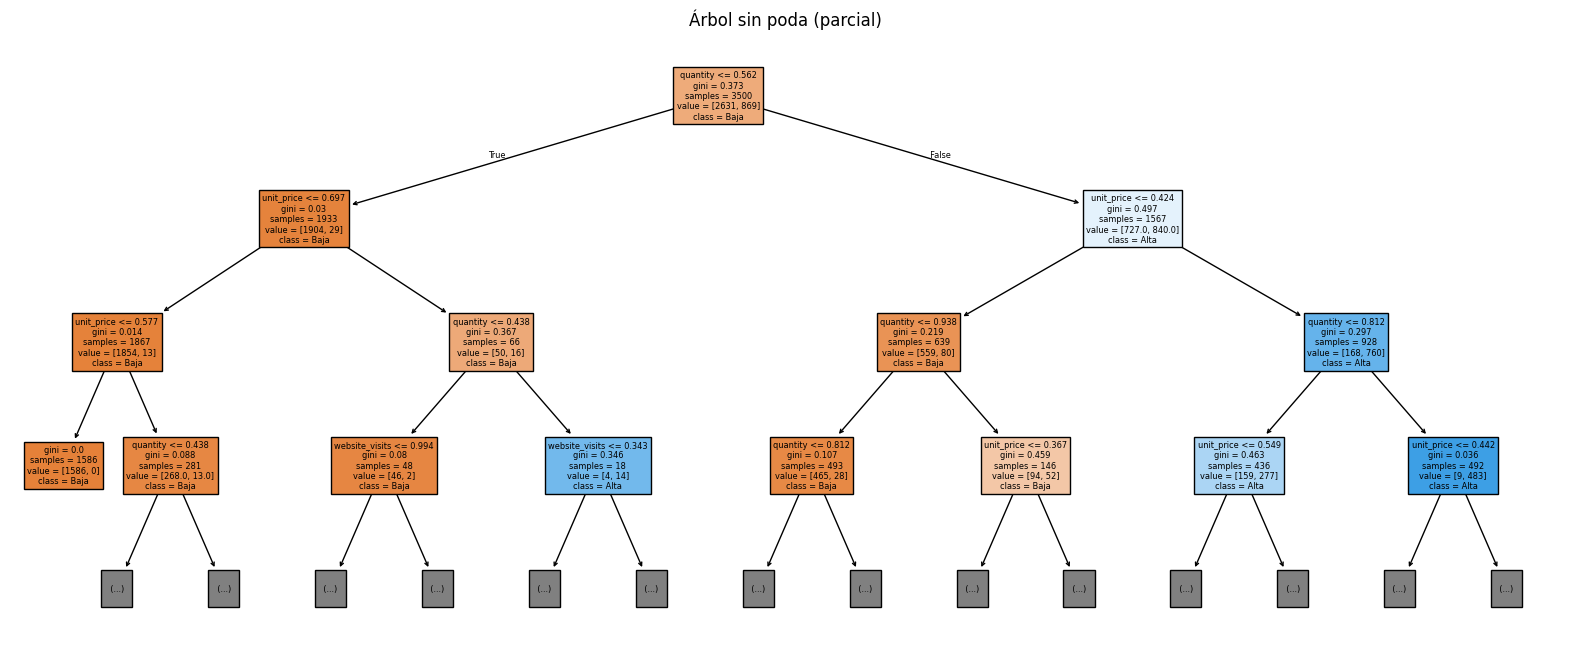

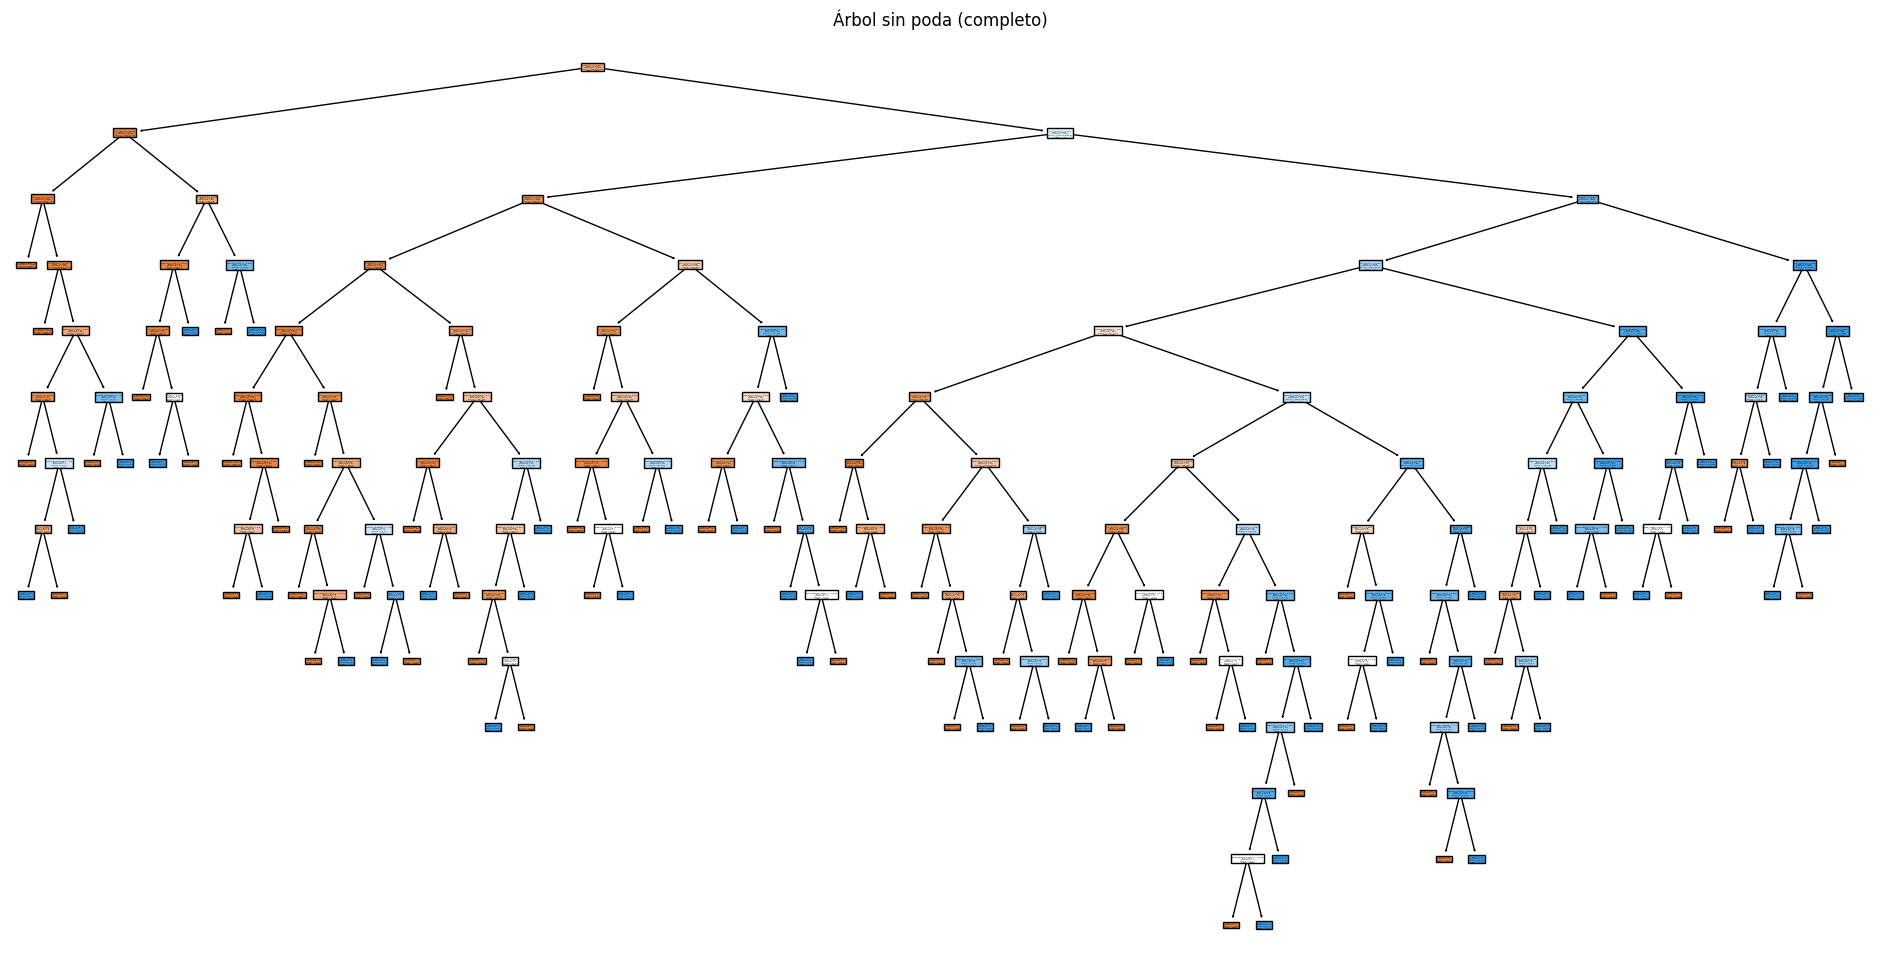

📊 Reporte de clasificación - Árbol sin poda
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1119
           1       0.89      0.91      0.90       381

    accuracy                           0.95      1500
   macro avg       0.93      0.94      0.93      1500
weighted avg       0.95      0.95      0.95      1500



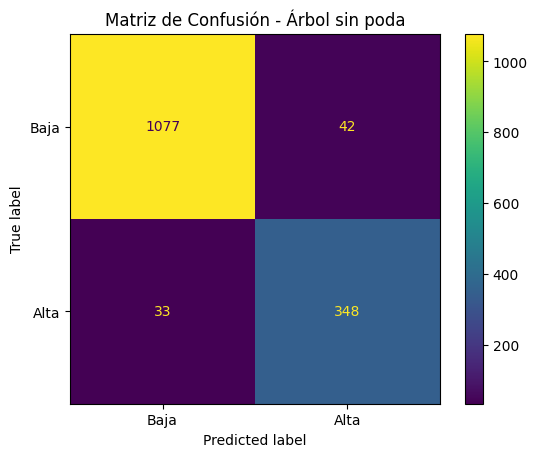

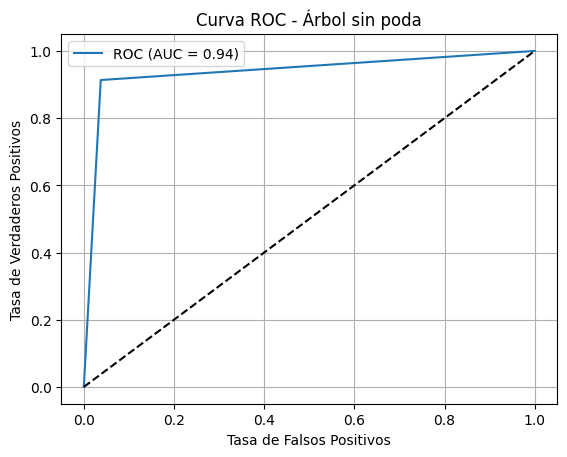

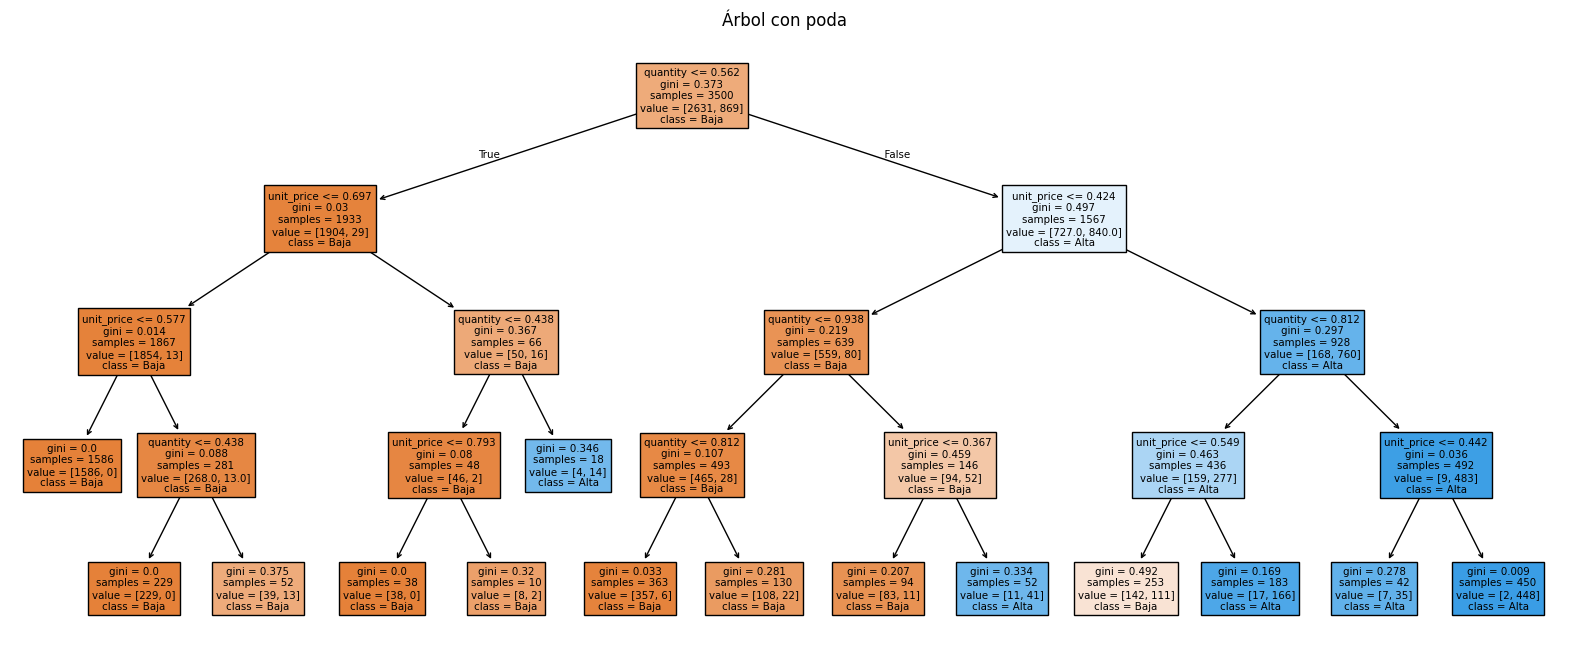

📊 Reporte de clasificación - Árbol podado
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1119
           1       0.93      0.77      0.84       381

    accuracy                           0.93      1500
   macro avg       0.93      0.88      0.90      1500
weighted avg       0.93      0.93      0.92      1500



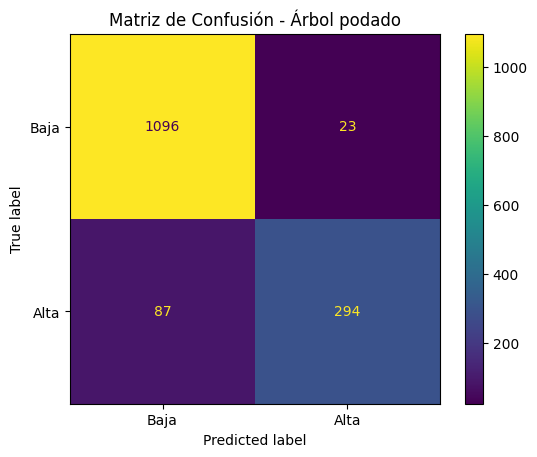

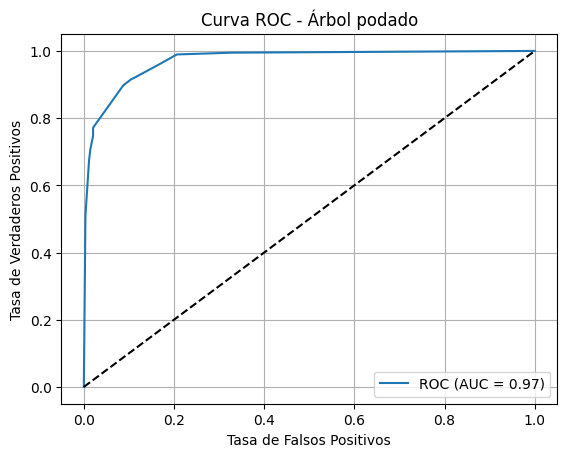

In [78]:
#Comparación Árbol de Decisión: Sin Poda vs Con Poda
# Dataset: Predicción de ventas significativas

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# 1. Árbol sin poda (completo)
tree_full = DecisionTreeClassifier( random_state=42 )
tree_full.fit(Xc_train, yc_train)

# Visualización parcial
plt.figure(figsize=(20, 8))
plot_tree(tree_full, feature_names=Xc_train.columns, class_names=["Baja", "Alta"], filled=True, max_depth=3)
plt.title("Árbol sin poda (parcial)")
plt.show()

# Visualización completa
plt.figure(figsize=(24, 12))
plot_tree(tree_full, feature_names=Xc_train.columns, class_names=["Baja", "Alta"], filled=True)
plt.title("Árbol sin poda (completo)")
plt.show()

# Evaluación sin poda
y_pred_full = tree_full.predict(Xc_test)
print("📊 Reporte de clasificación - Árbol sin poda")
print(classification_report(yc_test, y_pred_full))

ConfusionMatrixDisplay.from_estimator(tree_full, Xc_test, yc_test, display_labels=["Baja", "Alta"])
plt.title("Matriz de Confusión - Árbol sin poda")
plt.show()

y_scores = tree_full.predict_proba(Xc_test)[:, 1]
fpr, tpr, _ = roc_curve(yc_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Árbol sin poda")
plt.legend()
plt.grid(True)
plt.show()

# 2. Árbol con poda (max_depth y min_samples_leaf)
tree_pruned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)
tree_pruned.fit(Xc_train, yc_train)

plt.figure(figsize=(20, 8))
plot_tree(tree_pruned, feature_names=Xc_train.columns, class_names=["Baja", "Alta"], filled=True)
plt.title("Árbol con poda")
plt.show()

# Evaluación árbol podado
y_pred_pruned = tree_pruned.predict(Xc_test)
print("📊 Reporte de clasificación - Árbol podado")
print(classification_report(yc_test, y_pred_pruned))

ConfusionMatrixDisplay.from_estimator(tree_pruned, Xc_test, yc_test, display_labels=["Baja", "Alta"])
plt.title("Matriz de Confusión - Árbol podado")
plt.show()

y_scores_pruned = tree_pruned.predict_proba(Xc_test)[:, 1]
fpr_pruned, tpr_pruned, _ = roc_curve(yc_test, y_scores_pruned)
roc_auc_pruned = auc(fpr_pruned, tpr_pruned)

plt.figure()
plt.plot(fpr_pruned, tpr_pruned, label=f"ROC (AUC = {roc_auc_pruned:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Árbol podado")
plt.legend()
plt.grid(True)
plt.show()

El modelo de árbol de decisión sin poda logró una exactitud del 95%, con un excelente balance entre precisión y recall tanto para ventas bajas como altas. Específicamente, el modelo identificó correctamente el 91% de las ventas altas (recall clase 1), y mantuvo una alta precisión general. 
Asimismo, el árbol de decisión con poda logró una exaxctitud del 93% pero con una estructura más simple y robusta, reduce los falsos positivos, su capacidad para detectar ventas altas se ve comprometida, ya que su recall para la clase 1 baja a 77%, incrementando los falsos negativos.